In [57]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(reticulate)
  library(GenomicRanges)
  library(tmpRpkg)
})
# change the size of figures shown in jupyter
options(repr.plot.width=15, repr.plot.height=8)

In [49]:
# * set python env
use_condaenv(condaenv = "base",
  conda = "/home/szu/mambaforge/bin/conda")
pybw <- import("pyBigWig")


In [51]:
# * meta
projd <- here::here()
bwd <- file.path(projd, "data", "ptDNAbam", "bigwig")
peakd <- file.path(projd, "data", "pariedtag_peak", "subclass_peak")
epimemoutd <- file.path(projd, "09.epimem", "out")
intersect_region_d <- file.path(epimemoutd, "actRegionWithInactSignal")
repressMark <- "H3K27me3"
activeMark <- "H3K4me1"
sc <- "327_Oligo_NN"
# sc <- "326_OPC_NN"

In [54]:
# * functions
loadMappedSignals <- function(sc, from_m, to_m) {
  fnm <- file.path(epimemoutd,
    str_glue("{from_m}_on_{to_m}"),
    str_glue("{sc}_{from_m}-on-{to_m}_e2500.tsv"))
  r <- data.table::fread(
    file = fnm, header = TRUE, sep = "\t")
  return(r)
}

loadIntersectRegion <- function(sc, from_m, to_m) {
    fnm <- file.path(intersect_region_d, str_glue("{sc}.{from_m}_{to_m}.cross_interact.peak"))
    r <- data.table::fread(
        file = fnm, header = TRUE, sep = "\t")
    return(r)
}

In [6]:
# * main
# given a subclass, load peak-related signals
# H3K27me3 and h3K4me1
r2a <- loadMappedSignals(
  sc, repressMark, activeMark)
r2r <- loadMappedSignals(sc, repressMark, repressMark)
a2r <- loadMappedSignals(sc, activeMark, repressMark)
a2a <- loadMappedSignals(sc, activeMark, activeMark)

In [66]:
str(r2r)

Classes ‘data.table’ and 'data.frame':	285931 obs. of  12 variables:
 $ chrom             : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ startFrom         : int  3003217 3007043 3008110 3010654 3012010 3020411 3026362 3028529 3036944 3043617 ...
 $ endTo             : int  3004324 3007703 3009332 3011422 3012826 3021514 3026915 3031103 3037849 3044569 ...
 $ name              : chr  "1184_MOL_NN_4-H3K27me3-Female_peak_1" "1184_MOL_NN_4-H3K27me3-Female_peak_3" "1184_MOL_NN_4-H3K27me3-Male_peak_6" "1184_MOL_NN_4-H3K27me3-Female_peak_5" ...
 $ int10Neglog10qval : int  137 104 41 306 47 179 90 132 92 28 ...
 $ strand            : chr  "." "." "." "." ...
 $ foldChangeAtSummit: num  4.72 4.03 2.81 8.68 3 ...
 $ neglog10pval      : num  15.27 11.8 5.33 32.4 5.97 ...
 $ neglog10qval      : num  13.78 10.44 4.17 30.65 4.77 ...
 $ relaSummit        : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ ScorePerMillion   : num  4.45 3.38 1.33 12.26 1.53 ...
 $ H3K27me3_e2500    : num  0.96 1.22 1.336 1.095 0.75

In [20]:
# plot the signals to have a look firstly.
quantile(a2r$H3K4me1_e2500)
quantile(a2a$H3K4me1_e2500)

0%          25%          50%          75%         100% 
 0.002446846  0.221615950  0.379703896  0.774825751 14.516722850

0%         25%         50%         75%        100% 
0.009877102 0.788310250 1.159832811 1.732973192 9.560885458

In [23]:
quantile(r2a$H3K27me3_e2500)
quantile(r2r$H3K27me3_e2500)

0%         25%         50%         75%        100% 
0.007881988 0.350998203 0.623610347 1.223982620 9.564897208

0%         25%         50%         75%        100% 
0.007172931 0.757538217 1.008170878 1.319029248 7.604344787

In [24]:
all(r2a$name == a2a$name)
all(r2r$name == a2r$name)

[1] TRUE

[1] TRUE

In [8]:
d <- data.frame(
    r = c(r2r$H3K27me3_e2500, r2a$H3K27me3_e2500),
    a = c(a2r$H3K4me1_e2500, a2a$H3K4me1_e2500),
    k = c(rep("r", nrow(r2r)), c(rep("a", nrow(r2a))))
)

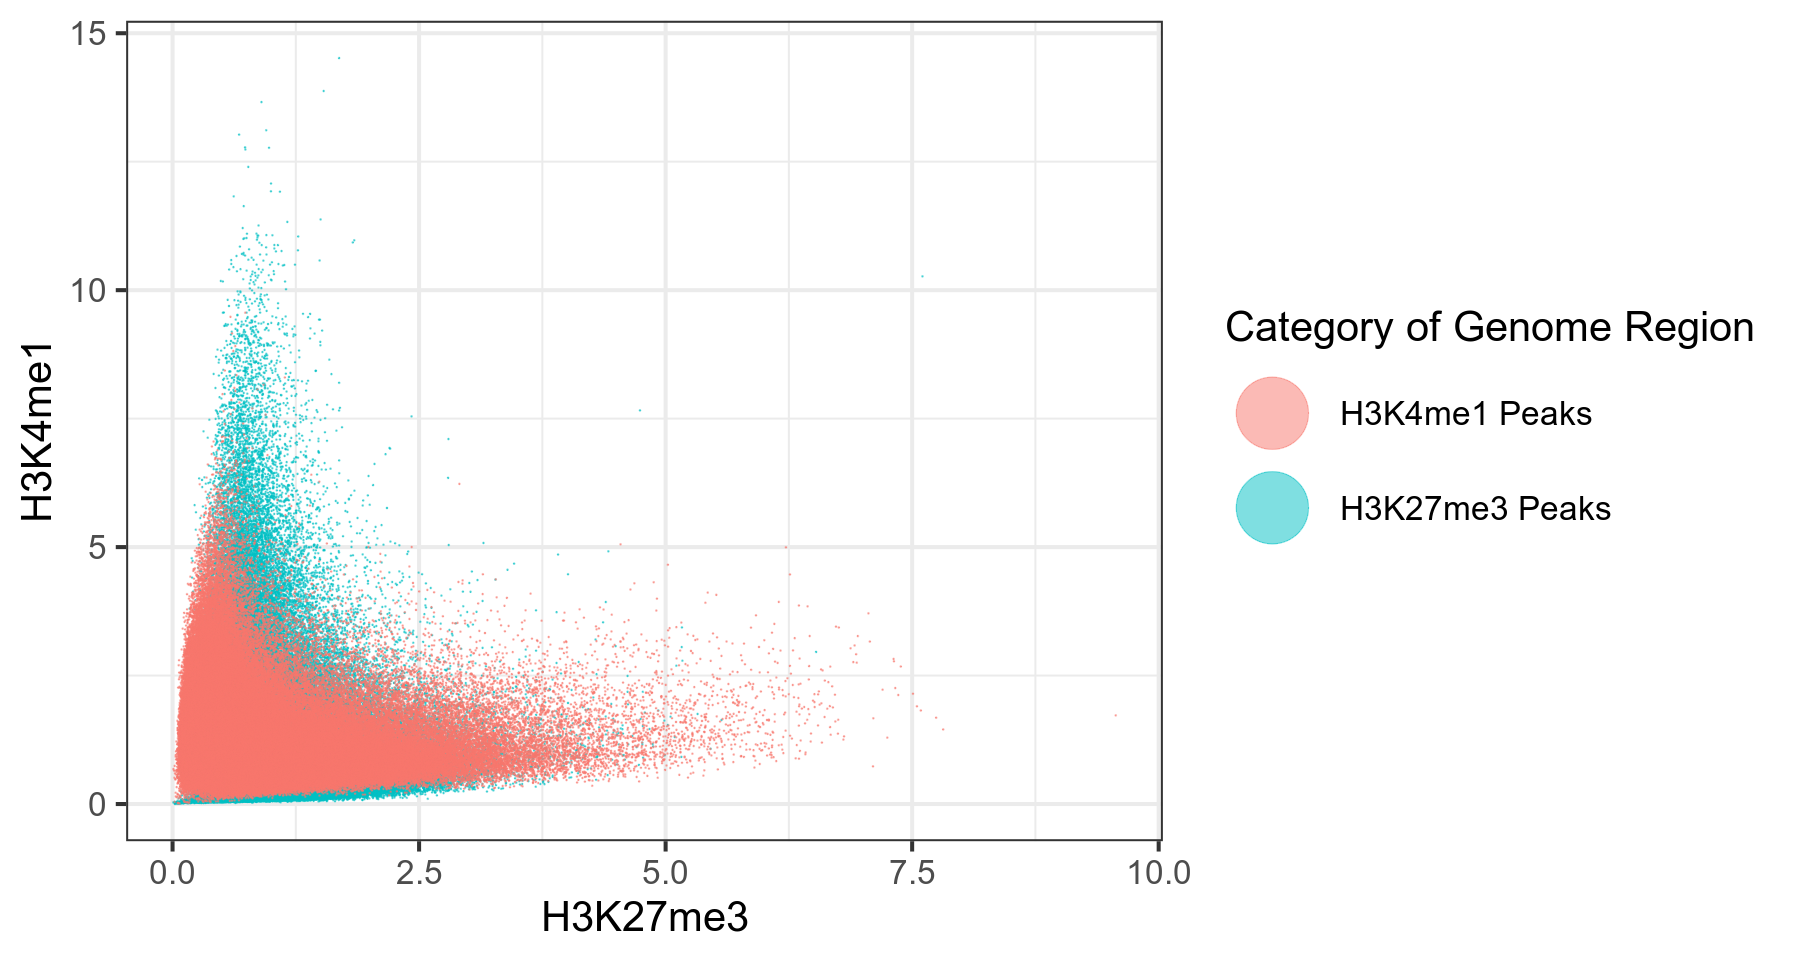

In [47]:
ggplot(d, aes(x = r, y = a)) +
  geom_point(size =0.1, aes(color = k), alpha = 0.5) +
  xlab("H3K27me3") +
  ylab("H3K4me1") +
  scale_color_discrete(name = "Category of Genome Region", labels = c(a="H3K4me1 Peaks", r="H3K27me3 Peaks")) +
  theme_bw(base_size = 25) + 
  guides(color = guide_legend(override.aes = list(size = 20)))

In [72]:
# check intersect region signals
ir <- loadIntersectRegion(sc, repressMark, activeMark)
irGR <- loadGRfromBed(beds = ir, head = TRUE)
str(irGR)

Characters out of +, -, * are found in strand column.

Treat them as *.

widthis not recommended in GenomicRanges.

Change it into width.1



Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 20 levels "chr1","chr2",..: 1 2 3 4 5 6 7 8 9 10 ...
  .. .. ..@ lengths        : int [1:20] 23 24 18 25 10 15 17 13 10 12 ...
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. ..@ start          : int [1:269] 42541279 56969370 56975317 74780283 74781915 74787552 74793382 74801592 75440089 75463678 ...
  .. .. ..@ width          : int [1:269] 608 4584 3423 868 3101 5403 7675 10038 22776 385 ...
  .. .. ..@ NAMES          : NULL
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ strand         :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 3 levels "+","-","*": 3
  .. .. ..@ lengths        : int 269


In [58]:
rGR <- loadGRfromBed(beds = r2r, head = TRUE)

Characters out of +, -, * are found in strand column.

Treat them as *.



In [59]:
str(rGR)

Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 21 levels "chr1","chr2",..: 1 2 3 4 5 6 7 8 9 10 ...
  .. .. ..@ lengths        : int [1:21] 22436 19679 18103 16436 16260 17226 14950 16054 13316 15164 ...
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. ..@ start          : int [1:285931] 3003217 3007043 3008110 3010654 3012010 3020411 3026362 3028529 3036944 3043617 ...
  .. .. ..@ width          : int [1:285931] 1108 661 1223 769 817 1104 554 2575 906 953 ...
  .. .. ..@ NAMES          : NULL
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ strand         :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 3 levels "+","-","*": 3
  .. .. ..@ leng

In [60]:
aGR <- loadGRfromBed(beds = a2a, head = TRUE)
str(aGR)

Characters out of +, -, * are found in strand column.

Treat them as *.



Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 21 levels "chr1","chr2",..: 1 2 3 4 5 6 7 8 9 10 ...
  .. .. ..@ lengths        : int [1:21] 13262 13837 9957 10882 11238 10540 9700 9115 9200 9207 ...
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. ..@ start          : int [1:177151] 3010551 3099840 3121859 3197398 3210055 3212122 3214853 3218481 3220844 3222220 ...
  .. .. ..@ width          : int [1:177151] 625 525 265 1074 1421 2290 3233 327 929 305 ...
  .. .. ..@ NAMES          : NULL
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ strand         :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 3 levels "+","-","*": 3
  .. .. ..@ lengths  

In [61]:
rGRext <- resizeIgnoreStrand(rGR, fix = "twoside", extsize = 2500)
aGRext <- resizeIgnoreStrand(aGR, fix = "twoside", extsize = 2500)

In [73]:
irext <- resizeIgnoreStrand(irGR, fix = "twoside", extsize = 2500)
r2ir_hits <- GenomicRanges::findOverlaps(query = rGRext, subject = irext)
a2ir_hits <- GenomicRanges::findOverlaps(query = aGRext, subject = irext)
length(unique(queryHits(r2ir_hits)))
length(unique(queryHits(a2ir_hits)))

[1] 479

[1] 547

In [74]:
r2r$ovlp <- "NoneOvlp"
a2a$ovlp <- "NoneOvlp"
r2r$ovlp[r2r$name %in% r2r$name[unique(queryHits(r2ir_hits))]] <- "Ovlp"
table(r2r$ovlp)
a2a$ovlp[a2a$name %in% a2a$name[unique(subjectHits(a2ir_hits))]] <- "Ovlp"
table(a2a$ovlp)


NoneOvlp     Ovlp 
  285452      479 


NoneOvlp     Ovlp 
  176882      269 

In [85]:
d$ovlp <- c(r2r$ovlp, a2a$ovlp)
d$size <- 0.2
d$size[d$ovlp == "Ovlp"] <- 2
d$alpha <- 0.2
d$alpha[d$ovlp == "Ovlp"] <- 1.0

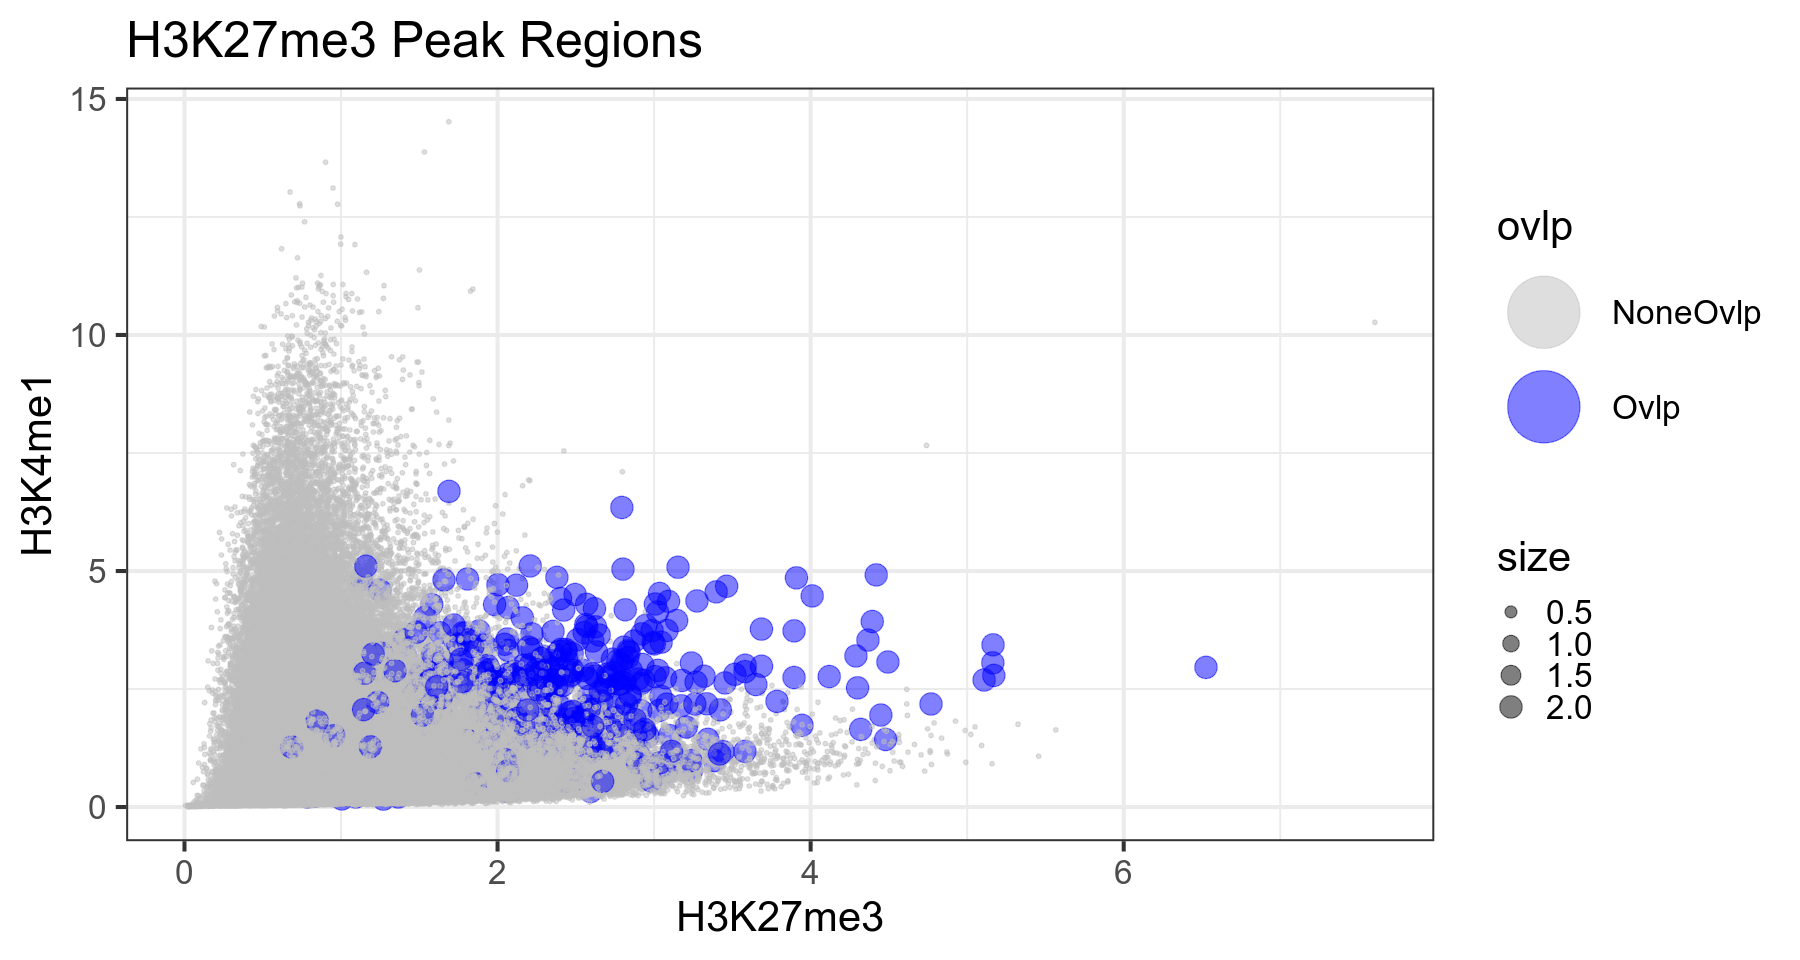

In [91]:
ggplot(d[d$k == "r", ], aes(x = r, y = a)) +
  geom_point(aes(size = size, color = ovlp), alpha = 0.5) +
  xlab("H3K27me3") +
  ylab("H3K4me1") +
  labs(title = "H3K27me3 Peak Regions") +
  theme_bw(base_size = 25) + 
  guides(color = guide_legend(override.aes = list(size = 20))) + 
  scale_color_manual(values = c("grey", "blue"))

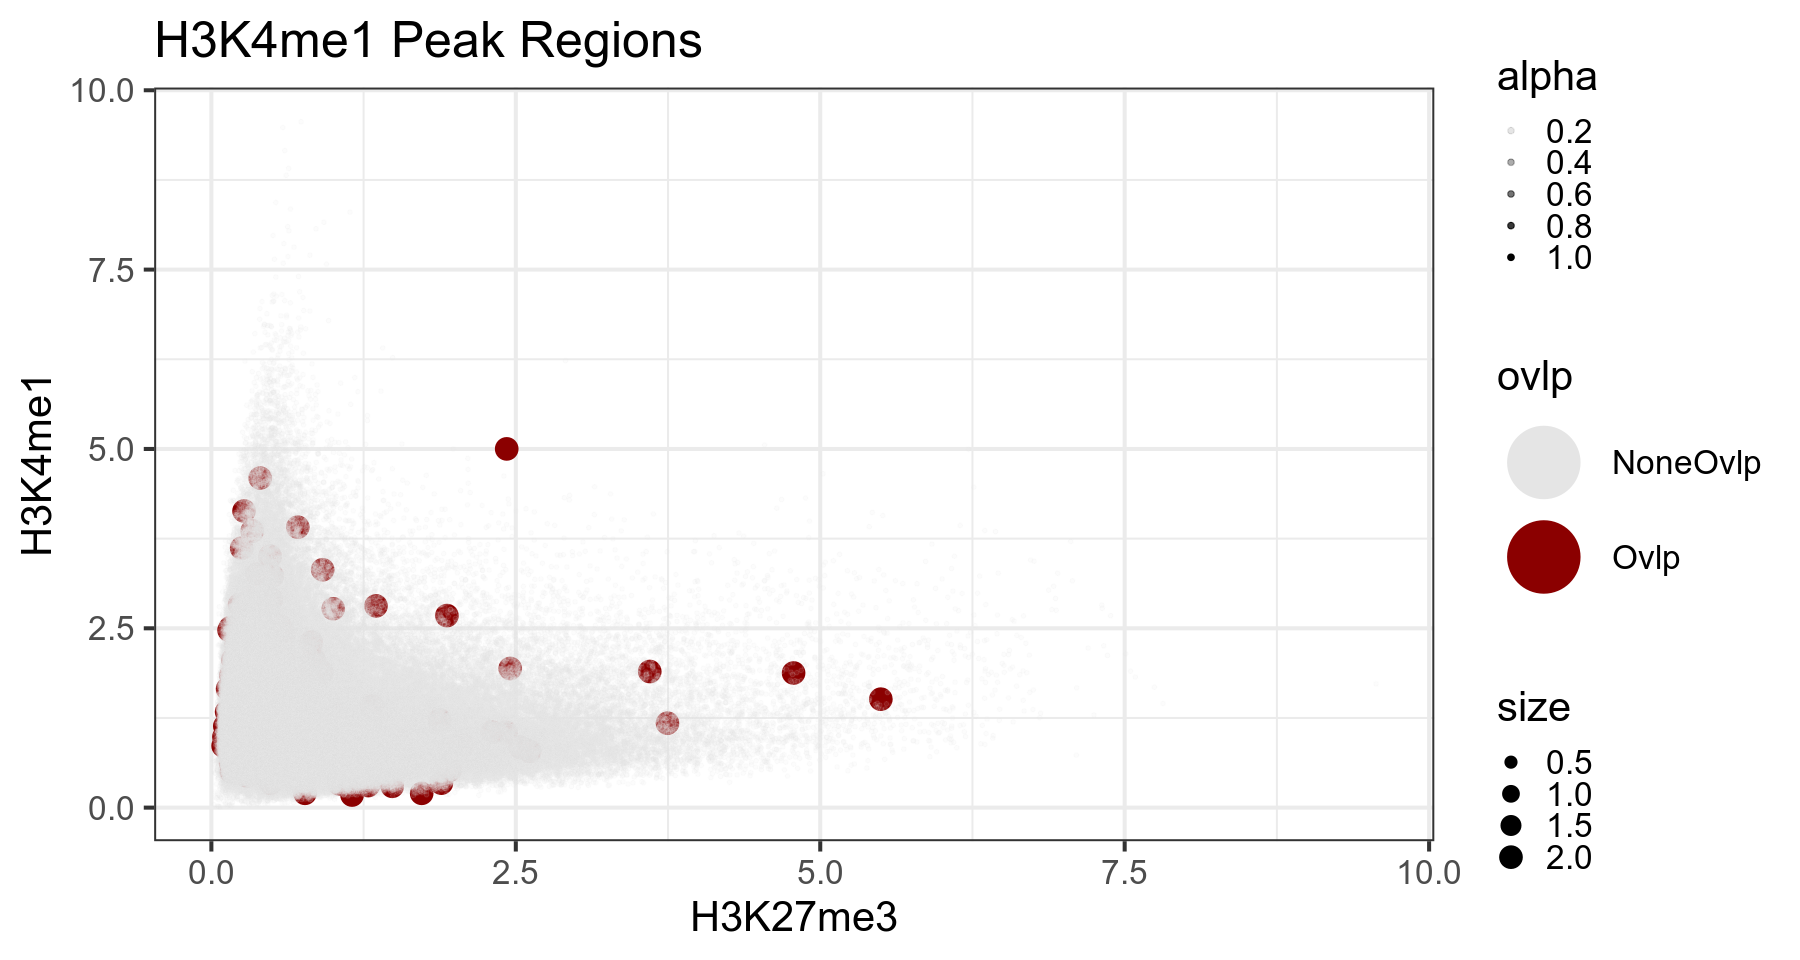

In [93]:
ggplot(d[d$k == "a", ], aes(x = r, y = a)) +
  geom_point(aes(size = size, color = ovlp, alpha = alpha)) +
  xlab("H3K27me3") +
  ylab("H3K4me1") +
  labs(title = "H3K4me1 Peak Regions") + 
  theme_bw(base_size = 25) + 
  guides(color = guide_legend(override.aes = list(size = 20))) + 
  scale_color_manual(values = c("grey90", "darkred"))


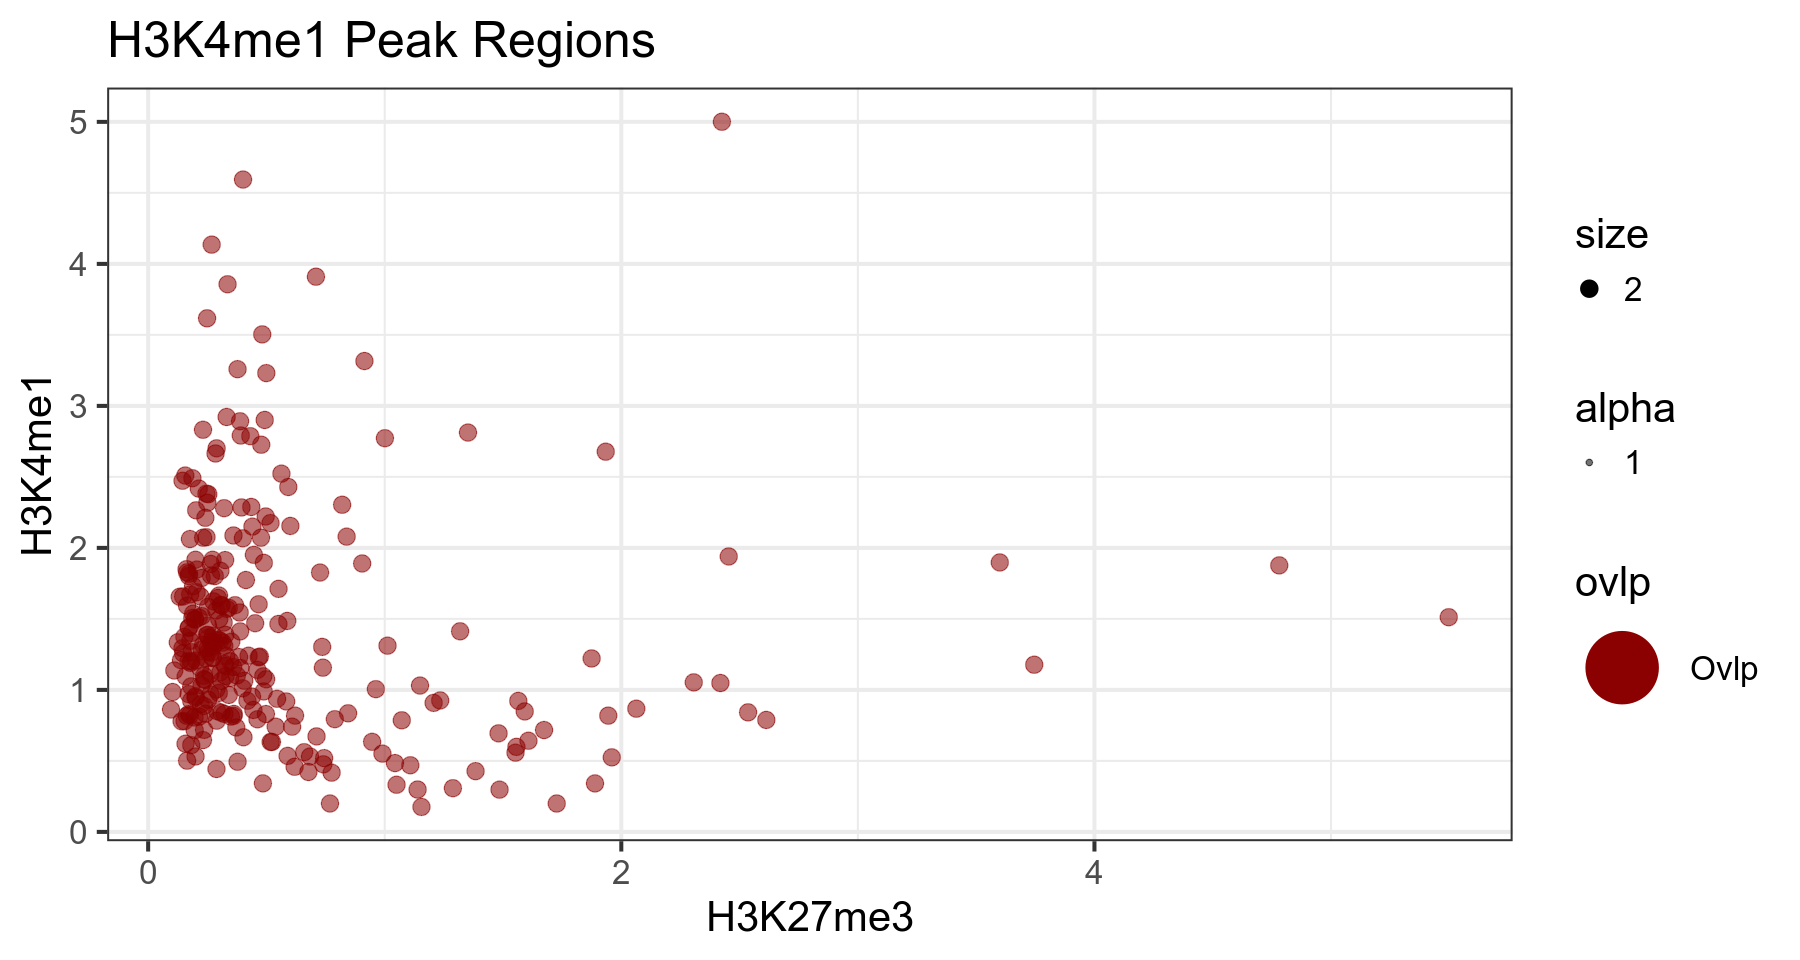

In [92]:
ggplot(d[d$k == "a" & d$ovlp == "Ovlp", ], aes(x = r, y = a)) +
  geom_point(aes(size = size, color = ovlp, alpha = alpha)) +
  xlab("H3K27me3") +
  ylab("H3K4me1") +
    labs(title = "H3K4me1 Peak Regions") + 
  theme_bw(base_size = 25) + 
  guides(color = guide_legend(override.aes = list(size = 20))) + 
  scale_color_manual(values = c("darkred"))
